In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.datasets import load_iris

In [6]:
df=pd.read_csv('DATABASE_CLEAN_STU_2.csv')

# Modelo de arbol de decisiones

In [7]:
data = df[['Dias', 'Ida/Vuelta', 'Hora Cu-Cu2', 'Hora Cu2-Cu','Satisfaccion', 'Espera Cu-Cu2', 'Espera Cu2-Cu', 'Frecuencia parado']]
X = data.drop('Frecuencia parado', axis=1)
y = data['Frecuencia parado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Resultados

Accuracy: 0.51
Matriz de Confusión:
[[  3   0   2   3   0]
 [  1  20   7  13   5]
 [  5  12 101  60  26]
 [  4  20  81 218  62]
 [  6  19  68 114 178]]


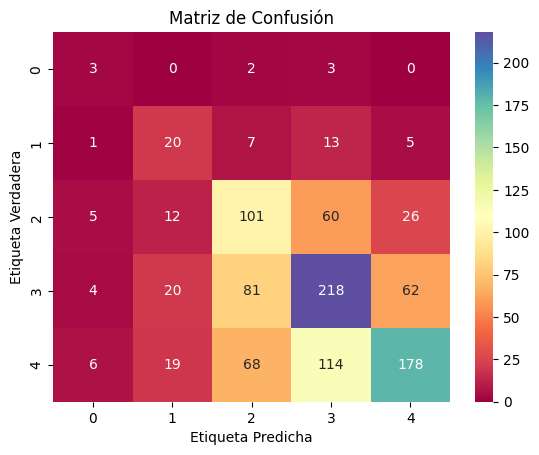

Tasa de Falsos Positivos: 0.00
Tasa de Falsos Negativos: 0.05


In [8]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Spectral')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()
false_positive_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
false_negative_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
print(f'Tasa de Falsos Positivos: {false_positive_rate:.2f}')
print(f'Tasa de Falsos Negativos: {false_negative_rate:.2f}')

In [ ]:
df_pred=pd.DataFrame({'Frecuencia':df['Frecuencia parado'],'Frecuencia pred':prueba_df})
df_pred

,Frecuencia,Frecuencia pred
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
3421,5,3
3422,4,4
3423,1,1
3424,1,4


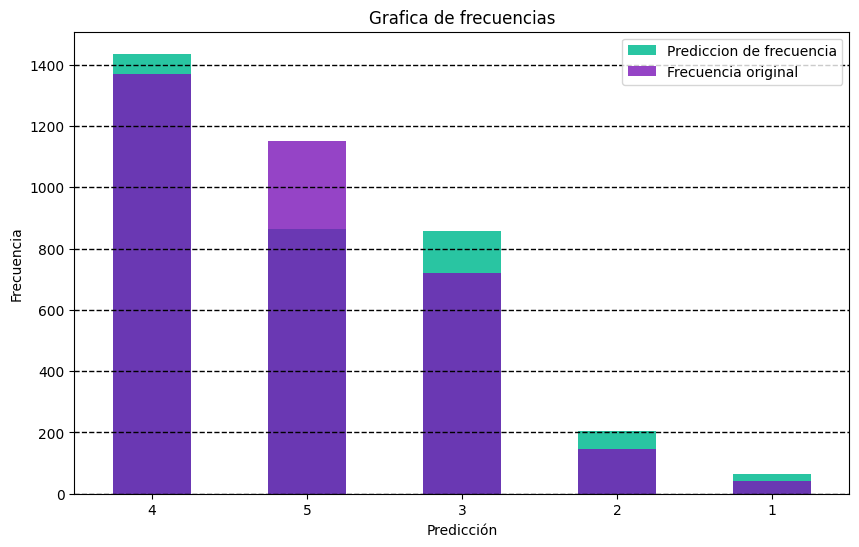

In [13]:
plt.figure(figsize=(10,6))
x=df_pred['Frecuencia pred'].value_counts().plot(kind='bar',color='#29c5a2',alpha=1)
y=df_pred['Frecuencia'].value_counts().plot(kind='bar',color='#7b15b8',alpha=0.8)
plt.title('Grafica de frecuencias')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
ax=plt.subplot()
ax.legend(['Prediccion de frecuencia', 'Frecuencia original'],loc='upper right')
plt.xticks(rotation=0,ha='center')
plt.grid(True,which='both',axis='y',linestyle='--',linewidth=1,alpha=1,color='black')